In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
dataset = pd.read_csv('../Iris.csv')
dataset.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
dataset = dataset.iloc[:, 1:-1]
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


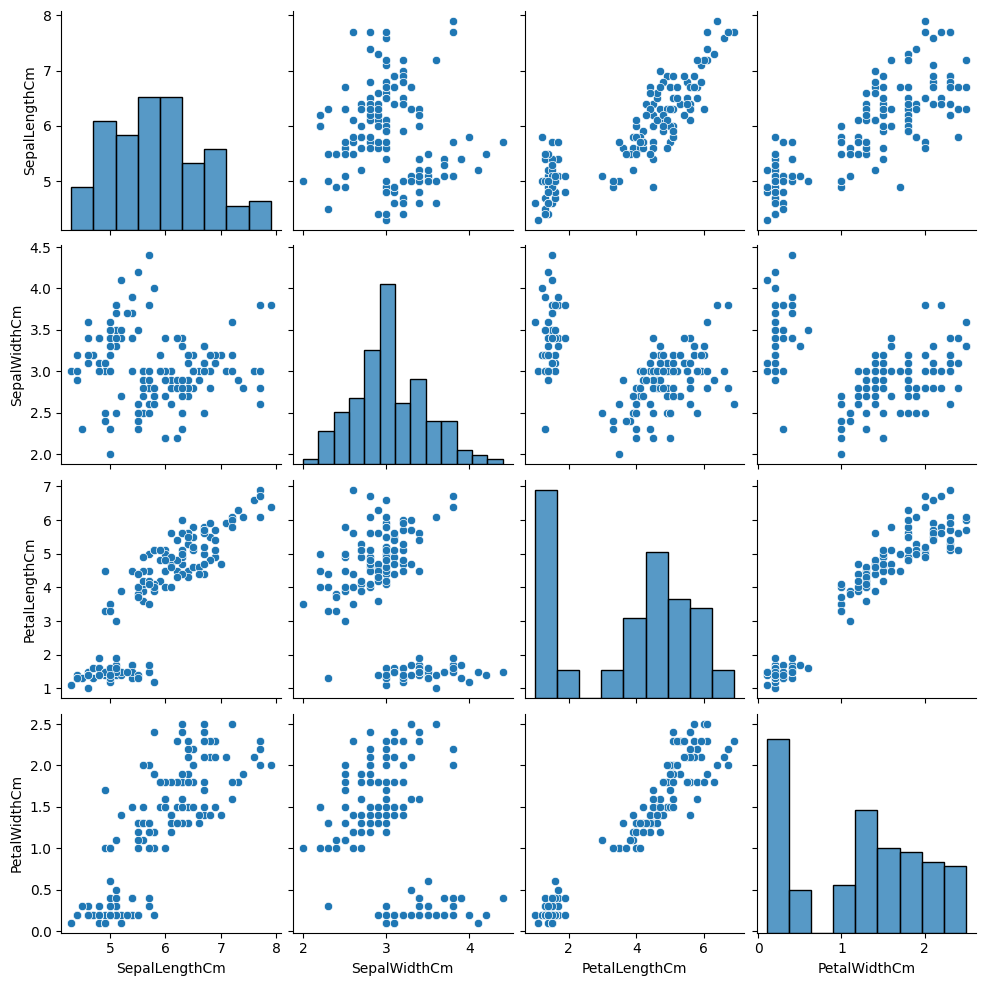

In [5]:
sns.pairplot(data=dataset)
plt.show()

In [6]:
wcss = []

for i in range(2, 21):
  km = KMeans(n_clusters=i, init='k-means++')
  km.fit(dataset)
  wcss.append(km.inertia_)

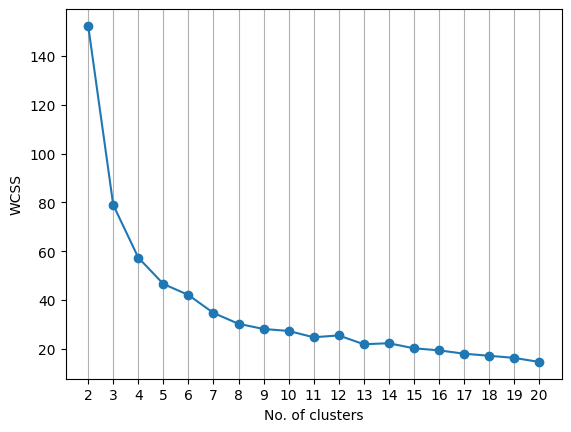

In [7]:
plt.Figure(figsize=(5, 20))
plt.plot([i for i in range(2, 21)], wcss, marker='o')
plt.xlabel("No. of clusters")
plt.xticks([i for i in range(2, 21)])
plt.grid(axis='x')
plt.ylabel('WCSS')
plt.show()

In [8]:
knn = KMeans(n_clusters=3, init='k-means++')
dataset['predict'] = knn.fit_predict(dataset)  

In [9]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


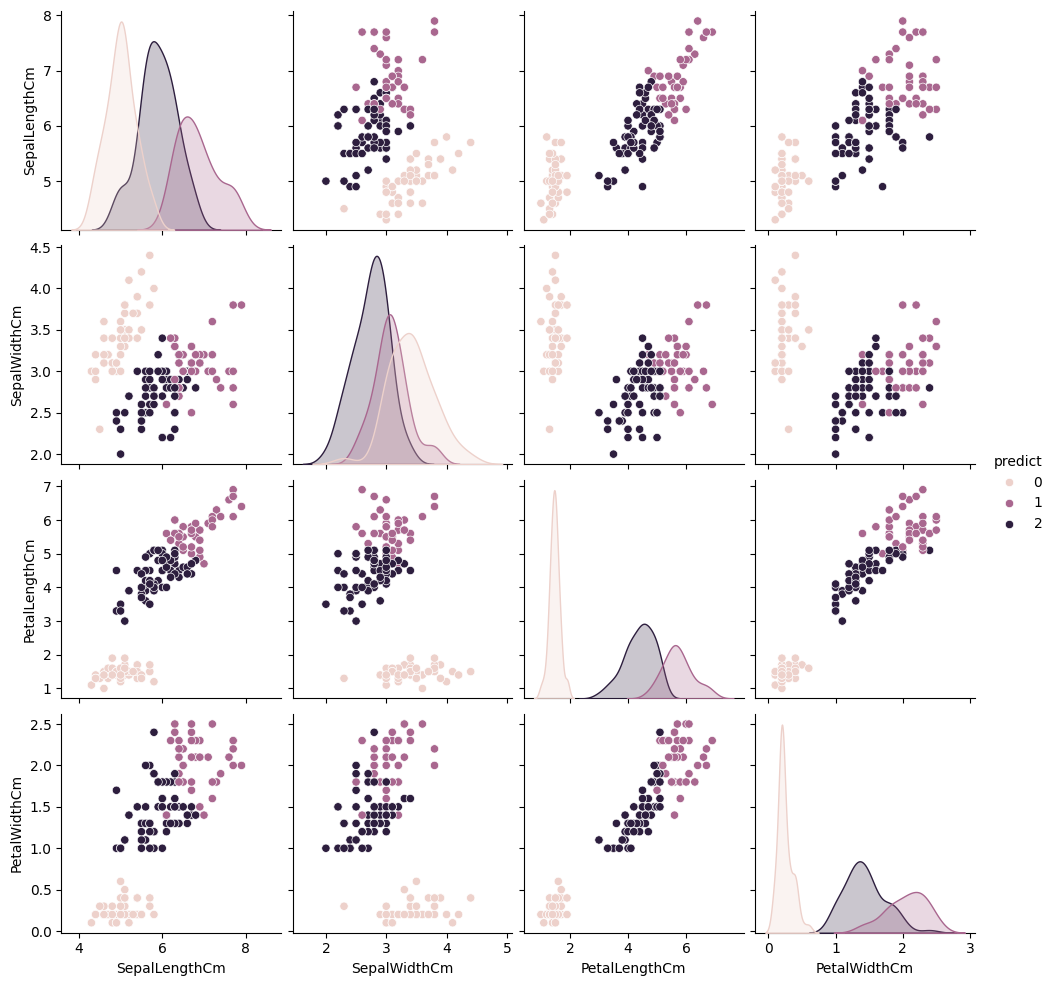

In [10]:
sns.pairplot(data=dataset, hue='predict')
plt.show()

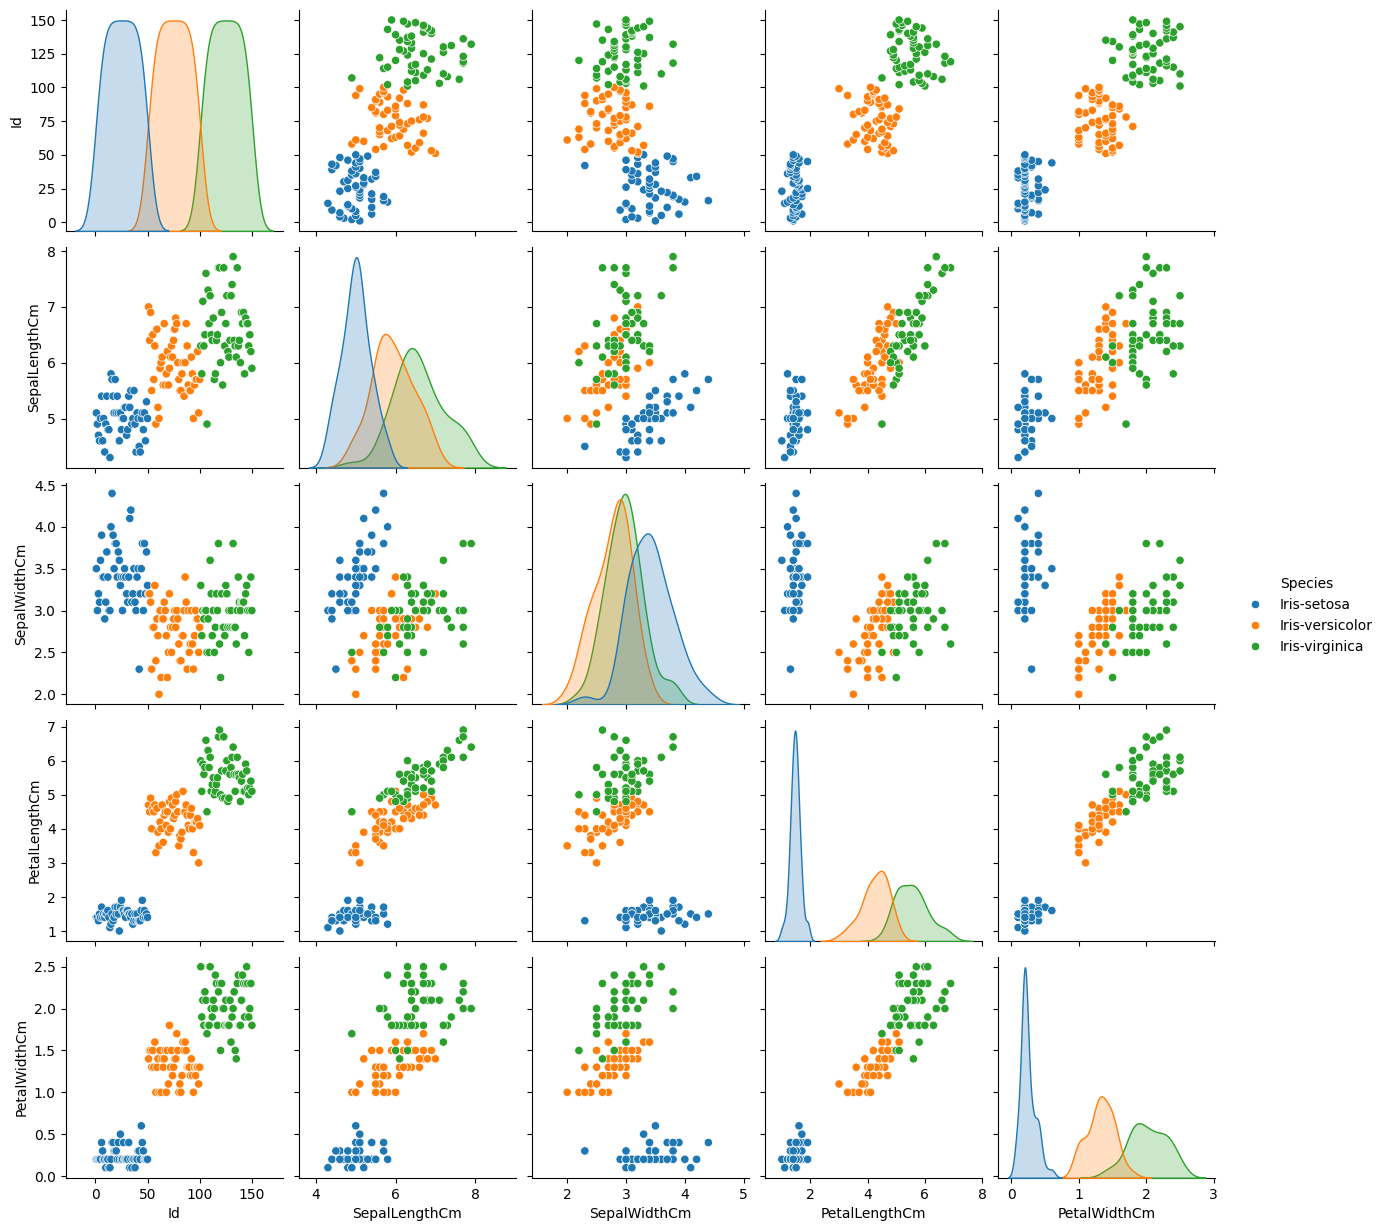

In [11]:
org = pd.read_csv('../Iris.csv')
sns.pairplot(data=org, hue='Species')
plt.show()

In [13]:
# so first try a range of no of cluster then plot it to find the best angle the elbow and then train your model on that data and kmean clustor is used only on linear seperable data.

# silhouette score

In [15]:
silhouette_score(dataset, labels=knn.labels_)

np.float64(0.6218780254335335)

In [18]:
ss = []
no = [i for i in range(2, 22)]

for i in range(2, 22):
    kn = KMeans(n_clusters=i, init='k-means++')
    kn.fit(dataset)
    ss.append(silhouette_score(dataset, labels=kn.labels_))

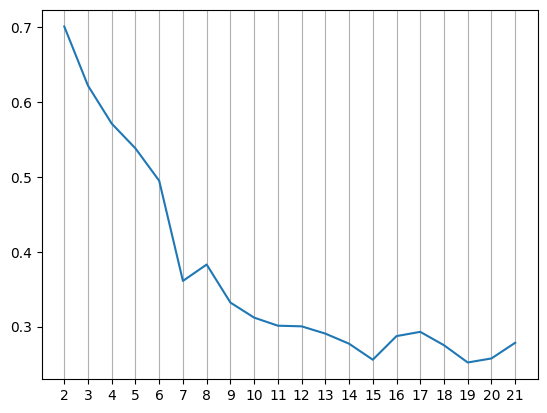

In [20]:
plt.plot(no, ss)
plt.xticks(no)
plt.grid(axis='x')
plt.show()

In [ ]:
# here in graph we can see for no. of clustor = 2 is the best this is how we verify how must of no. of clustor is best.